# **FYP Data Understanding**

**Import Module**

All the import module will be written below

In [1]:
import pandas as pd
from tabulate import tabulate
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt
from langdetect import detect, DetectorFactory

**Function for Statistical Analysis (Class Variable)**

In [2]:
def categorical_summary(df):
    summary = []

    for col in df.select_dtypes(include='object').columns:
        value_counts = df[col].value_counts(dropna=False)
        n_missing = df[col].isnull().sum()
        n_levels = df[col].nunique(dropna=True)

        mode1 = value_counts.index[0]
        mode1_pct = round(100 * value_counts.iloc[0] / len(df), 2)

        if len(value_counts) > 1:
            mode2 = value_counts.index[1]
            mode2_pct = round(100 * value_counts.iloc[1] / len(df), 2)
        else:
            mode2 = None
            mode2_pct = None

        summary.append({
            'Variable Name': col,
            'Levels': n_levels,
            'Missing': n_missing,
            'Mode': mode1,
            'Mode %': mode1_pct,
            'Mode2': mode2,
            'Mode2 %': mode2_pct
        })

    return pd.DataFrame(summary)

**Function for Statistical Analysis (Interval Variable)**

In [4]:
def interval_summary(df):
    summary = []

    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

    for col in numeric_cols:
        data = df[col].dropna()
        n_missing = df[col].isnull().sum()

        summary.append({
            'Variable': col,
            'Mean': round(data.mean(), 4),
            'Std Dev': round(data.std(), 4),
            'Missing': n_missing,
            'Min': data.min(),
            'Median': data.median(),
            'Max': data.max(),
            'Skewness': round(skew(data), 4),
            'Kurtosis': round(kurtosis(data), 4)
        })

    return pd.DataFrame(summary)

**olist_products_dataset.csv**

Read olist_products_dataset.csv

In [15]:
product_df = pd.read_csv("data/olist_products_dataset.csv")
product_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


Check Data Type

In [17]:
print(product_df.dtypes)

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object


Check Duplicate Rows and product_id

In [18]:
duplicate_rows = product_df[product_df.duplicated()]
print(f"Total duplicate rows: {len(duplicate_rows)}")

print(duplicate_rows)

duplicate_product_ids = product_df[product_df.duplicated(subset=['product_id'])]
print(f"Total duplicate product IDs: {len(duplicate_product_ids)}")

print(duplicate_product_ids)

Total duplicate rows: 0
Empty DataFrame
Columns: [product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm]
Index: []
Total duplicate product IDs: 0
Empty DataFrame
Columns: [product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm]
Index: []


Statistical Analysis (Class Variable)

In [20]:
cat_summary = categorical_summary(product_df)
print(tabulate(cat_summary, headers='keys', tablefmt='pretty', showindex=False))

+-----------------------+--------+---------+----------------------------------+--------+----------------------------------+---------+
|     Variable Name     | Levels | Missing |               Mode               | Mode % |              Mode2               | Mode2 % |
+-----------------------+--------+---------+----------------------------------+--------+----------------------------------+---------+
|      product_id       | 32951  |    0    | 1e9e8ef04dbcff4541ed26657ea517e5 |  0.0   | 3aa071139cb16b67ca9e5dea641aaa2f |   0.0   |
| product_category_name |   73   |   610   |         cama_mesa_banho          |  9.19  |          esporte_lazer           |   8.7   |
+-----------------------+--------+---------+----------------------------------+--------+----------------------------------+---------+


Check Language for the product_category_name column

In [6]:
DetectorFactory.seed = 0
def detect_language(text):
    try:
        return detect(str(text))
    except:
        return "unknown"

product_df['language'] = product_df['product_category_name'].apply(detect_language)

print(product_df['language'].value_counts())
print(product_df['language'].unique())

language
pt    11912
es     7150
ro     4028
it     2717
lt     2114
id     1849
en      900
sq      719
tl      610
fr      373
af      216
ca      128
da      104
cy       53
hr       48
hu       30
Name: count, dtype: int64
['pt' 'fr' 'es' 'id' 'it' 'ro' 'lt' 'en' 'hu' 'sq' 'tl' 'af' 'cy' 'ca'
 'da' 'hr']


Statistical Analysis (Interval Variable)

In [22]:
interval_summary = interval_summary(product_df)
print(tabulate(interval_summary, headers='keys', tablefmt='pretty', showindex=False))

+----------------------------+-----------+-----------+---------+-----+--------+---------+----------+----------+
|          Variable          |   Mean    |  Std Dev  | Missing | Min | Median |   Max   | Skewness | Kurtosis |
+----------------------------+-----------+-----------+---------+-----+--------+---------+----------+----------+
|    product_name_lenght     |  48.4769  |  10.2457  |   610   | 5.0 |  51.0  |  76.0   | -0.9032  |  0.1923  |
| product_description_lenght | 771.4953  | 635.1152  |   610   | 4.0 | 595.0  | 3992.0  |  1.962   |  4.828   |
|     product_photos_qty     |   2.189   |  1.7368   |   610   | 1.0 |  1.0   |  20.0   |  2.1933  |  7.2622  |
|      product_weight_g      | 2276.4725 | 4282.0387 |    2    | 0.0 | 700.0  | 40425.0 |  3.6047  | 15.1311  |
|     product_length_cm      |  30.8151  |  16.9145  |    2    | 7.0 |  25.0  |  105.0  |  1.7504  |  3.5129  |
|     product_height_cm      |  16.9377  |  13.6376  |    2    | 2.0 |  13.0  |  105.0  |   2.14   |  6.

**product_category_name_translation.csv**

Read product_category_name_translation.csv

In [9]:
product_translation_df = pd.read_csv("data/product_category_name_translation.csv")
product_translation_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


Check Duplicate Rows and product_id

In [13]:
duplicate_rows = product_translation_df[product_translation_df.duplicated()]
print(f"Total duplicate rows: {len(duplicate_rows)}")

print(duplicate_rows)

Total duplicate rows: 0
Empty DataFrame
Columns: [product_category_name, product_category_name_english]
Index: []


Check Data Type

In [10]:
print(product_translation_df.dtypes)

product_category_name            object
product_category_name_english    object
dtype: object


Statistical Analysis (Class Variable)

In [ ]:
cat_summary = categorical_summary(product_translation_df)
print(tabulate(cat_summary, headers='keys', tablefmt='pretty', showindex=False))

+-------------------------------+--------+---------+---------------+--------+------------------------+---------+
|         Variable Name         | Levels | Missing |     Mode      | Mode % |         Mode2          | Mode2 % |
+-------------------------------+--------+---------+---------------+--------+------------------------+---------+
|     product_category_name     |   71   |    0    | beleza_saude  |  1.41  | informatica_acessorios |  1.41   |
| product_category_name_english |   71   |    0    | health_beauty |  1.41  | computers_accessories  |  1.41   |
+-------------------------------+--------+---------+---------------+--------+------------------------+---------+


**olist_orders_dataset.csv**

Read olist_orders_dataset

In [6]:
order_df = pd.read_csv("data/olist_orders_dataset.csv")
order_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


Check Data Type

In [3]:
print(order_df.dtypes)

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


Check Duplicate Rows and order_id

In [4]:
duplicate_rows = order_df[order_df.duplicated()]
print(f"Total duplicate rows: {len(duplicate_rows)}")

print(duplicate_rows)

duplicate_order_ids = order_df[order_df.duplicated(subset=['order_id'])]
print(f"Total duplicate order IDs: {len(duplicate_order_ids)}")

print(duplicate_order_ids)

Total duplicate rows: 0
Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date]
Index: []
Total duplicate order IDs: 0
Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date]
Index: []


Statistical Analysis (Class Variable)

In [8]:
cat_summary = categorical_summary(order_df)
print(tabulate(cat_summary, headers='keys', tablefmt='pretty', showindex=False))

+-------------------------------+--------+---------+----------------------------------+--------+----------------------------------+---------+
|         Variable Name         | Levels | Missing |               Mode               | Mode % |              Mode2               | Mode2 % |
+-------------------------------+--------+---------+----------------------------------+--------+----------------------------------+---------+
|           order_id            | 99441  |    0    | e481f51cbdc54678b7cc49136f2d6af7 |  0.0   | 53cdb2fc8bc7dce0b6741e2150273451 |   0.0   |
|          customer_id          | 99441  |    0    | 9ef432eb6251297304e76186b10a928d |  0.0   | b0830fb4747a6c6d20dea0b8c802d7ef |   0.0   |
|         order_status          |   8    |    0    |            delivered             | 97.02  |             shipped              |  1.11   |
|   order_purchase_timestamp    | 98875  |    0    |       2018-08-02 12:05:26        |  0.0   |       2018-07-28 13:11:22        |   0.0   |
|     

Graphical Analysis

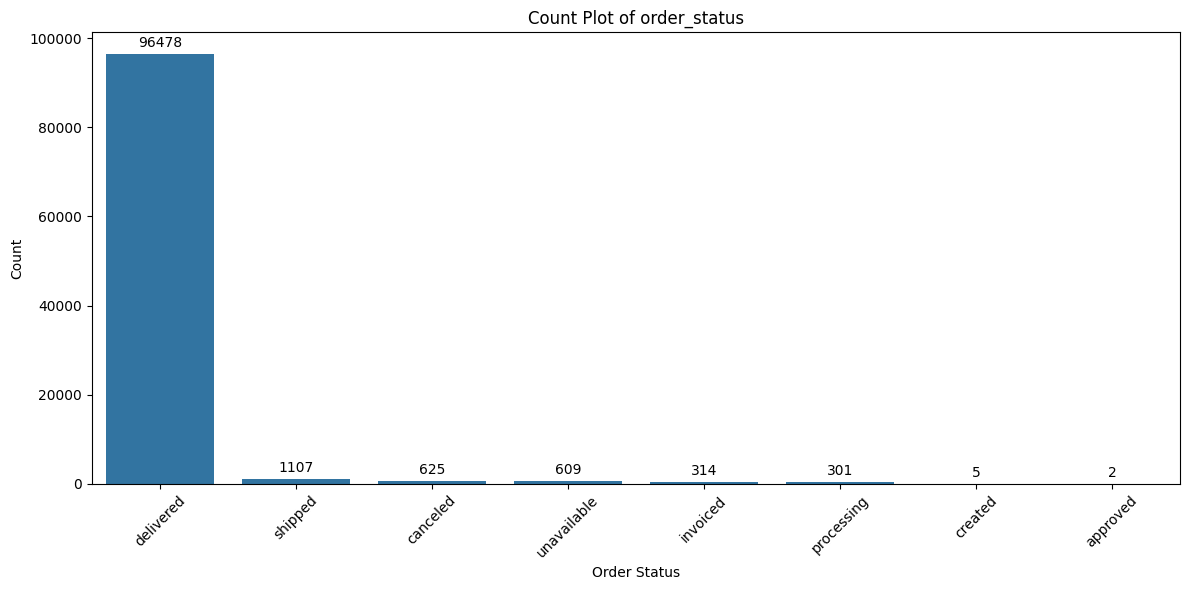

In [8]:
def plot_categorical_columns(df):
    plt.figure(figsize=(12, 6))
    
    ax = sns.countplot(
        data=df, 
        x='order_status', 
        order=df['order_status'].value_counts().index
    )

    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
    
    # Styling
    plt.title('Count Plot of order_status')
    plt.xlabel('Order Status')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call function
plot_categorical_columns(order_df)

In [15]:
order_df['order_purchase_timestamp'] = pd.to_datetime(order_df['order_purchase_timestamp'])
print(order_df['order_purchase_timestamp'].min())
print(order_df['order_purchase_timestamp'].max())
daily_orders = order_df.groupby(order_df['order_purchase_timestamp'].dt.date).size()
monthly_orders = order_df.groupby(order_df['order_purchase_timestamp'].dt.to_period('M')).size()

2016-09-04 21:15:19
2018-10-17 17:30:18


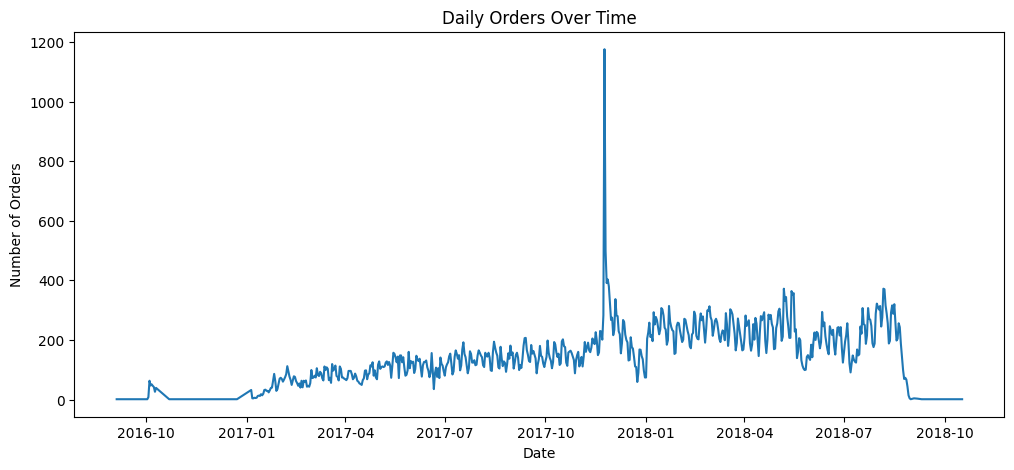

In [14]:
daily_orders.plot(figsize=(12,5))
plt.title("Daily Orders Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.show()

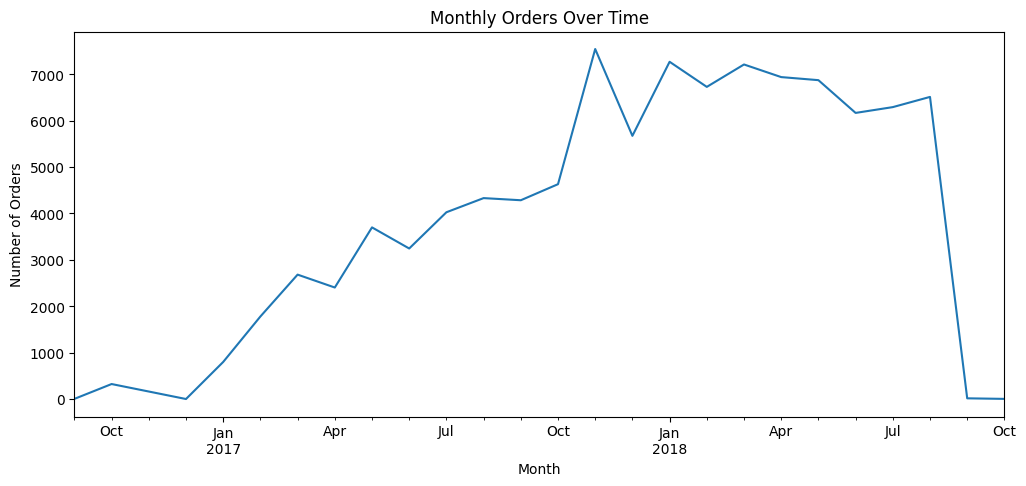

In [16]:
monthly_orders.plot(figsize=(12,5))
plt.title("Monthly Orders Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()

Understand Missing Value for the datatime columns

In [33]:
empty_approved = order_df[
    order_df['order_approved_at'].isna() | (order_df['order_approved_at'].astype(str).str.strip() == '')
]
print(len(empty_approved))
unique_statuses = empty_approved['order_status'].unique()
unique_statuses

160


array(['canceled', 'delivered', 'created'], dtype=object)

In [35]:
empty_both = order_df[
    (order_df['order_approved_at'].isna() | (order_df['order_approved_at'].astype(str).str.strip() == '')) &
    (order_df['order_delivered_carrier_date'].isna() | (order_df['order_delivered_carrier_date'].astype(str).str.strip() == ''))
]
print(len(empty_both))
unique_statuses = empty_both['order_status'].unique()
unique_statuses

146


array(['canceled', 'created'], dtype=object)

In [36]:
empty_delivered_carrier = order_df[
    (order_df['order_delivered_carrier_date'].isna() | (order_df['order_delivered_carrier_date'].astype(str).str.strip() == ''))
]
print(len(empty_delivered_carrier))
unique_statuses = empty_delivered_carrier['order_status'].unique()
unique_statuses

1783


array(['invoiced', 'processing', 'unavailable', 'canceled', 'created',
       'approved', 'delivered'], dtype=object)

In [38]:
empty_three = order_df[
    (order_df['order_approved_at'].isna() | (order_df['order_approved_at'].astype(str).str.strip() == '')) &
    (order_df['order_delivered_carrier_date'].isna() | (order_df['order_delivered_carrier_date'].astype(str).str.strip() == '')) &
    (order_df['order_delivered_customer_date'].isna() | (order_df['order_delivered_customer_date'].astype(str).str.strip() == ''))
]
print(len(empty_three))
unique_statuses = empty_three['order_status'].unique()
unique_statuses

146


array(['canceled', 'created'], dtype=object)

In [ ]:
empty_both = order_df[
    (order_df['order_delivered_carrier_date'].isna() | (order_df['order_delivered_carrier_date'].astype(str).str.strip() == '')) &
    (order_df['order_delivered_customer_date'].isna() | (order_df['order_delivered_customer_date'].astype(str).str.strip() == ''))
]
print(len(empty_both))
unique_statuses = empty_both['order_status'].unique()
unique_statuses

1782


array(['invoiced', 'processing', 'unavailable', 'canceled', 'created',
       'approved', 'delivered'], dtype=object)

In [7]:
empty_delivered_customer = order_df[
    (order_df['order_delivered_customer_date'].isna() | (order_df['order_delivered_customer_date'].astype(str).str.strip() == '')) &
    ~(order_df['order_delivered_carrier_date'].isna() | (order_df['order_delivered_carrier_date'].astype(str).str.strip() == ''))
]

print(len(empty_delivered_customer))
unique_statuses = empty_delivered_customer['order_status'].unique()
unique_statuses

1183


array(['shipped', 'canceled', 'delivered'], dtype=object)

**olist_order_items_dataset.csv**

Read olist_order_items_dataset

In [5]:
order_items_df = pd.read_csv("data/olist_order_items_dataset.csv")
order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


Check Data Type

In [6]:
print(order_items_df.dtypes)

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object


Check Duplicate Rows

In [7]:
duplicate_rows = order_items_df[order_items_df.duplicated()]
print(f"Total duplicate rows: {len(duplicate_rows)}")

print(duplicate_rows)

Total duplicate rows: 0
Empty DataFrame
Columns: [order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value]
Index: []


Statistical Analysis (Class Variable)

In [8]:
cat_summary = categorical_summary(order_items_df)
print(tabulate(cat_summary, headers='keys', tablefmt='pretty', showindex=False))

+---------------------+--------+---------+----------------------------------+--------+----------------------------------+---------+
|    Variable Name    | Levels | Missing |               Mode               | Mode % |              Mode2               | Mode2 % |
+---------------------+--------+---------+----------------------------------+--------+----------------------------------+---------+
|      order_id       | 98666  |    0    | 8272b63d03f5f79c56e9e4120aec44ef |  0.02  | 1b15974a0141d54e36626dca3fdc731a |  0.02   |
|     product_id      | 32951  |    0    | aca2eb7d00ea1a7b8ebd4e68314663af |  0.47  | 99a4788cb24856965c36a24e339b6058 |  0.43   |
|      seller_id      |  3095  |    0    | 6560211a19b47992c3666cc44a7e94c0 |  1.8   | 4a3ca9315b744ce9f8e9374361493884 |  1.76   |
| shipping_limit_date | 93318  |    0    |       2017-07-21 18:25:23        |  0.02  |       2018-03-01 02:50:48        |  0.02   |
+---------------------+--------+---------+----------------------------------

Statistical Analysis (Interval Variable)

In [9]:
interval_summary = interval_summary(order_items_df)
print(tabulate(interval_summary, headers='keys', tablefmt='pretty', showindex=False))

+---------------+----------+----------+---------+------+--------+--------+----------+----------+
|   Variable    |   Mean   | Std Dev  | Missing | Min  | Median |  Max   | Skewness | Kurtosis |
+---------------+----------+----------+---------+------+--------+--------+----------+----------+
| order_item_id |  1.1978  |  0.7051  |    0    | 1.0  |  1.0   |  21.0  |  7.5803  | 103.8527 |
|     price     | 120.6537 | 183.6339 |    0    | 0.85 | 74.99  | 6735.0 |  7.9231  | 120.8229 |
| freight_value | 19.9903  | 15.8064  |    0    | 0.0  | 16.26  | 409.68 |  5.6398  | 59.7855  |
+---------------+----------+----------+---------+------+--------+--------+----------+----------+


Graphical Analysis

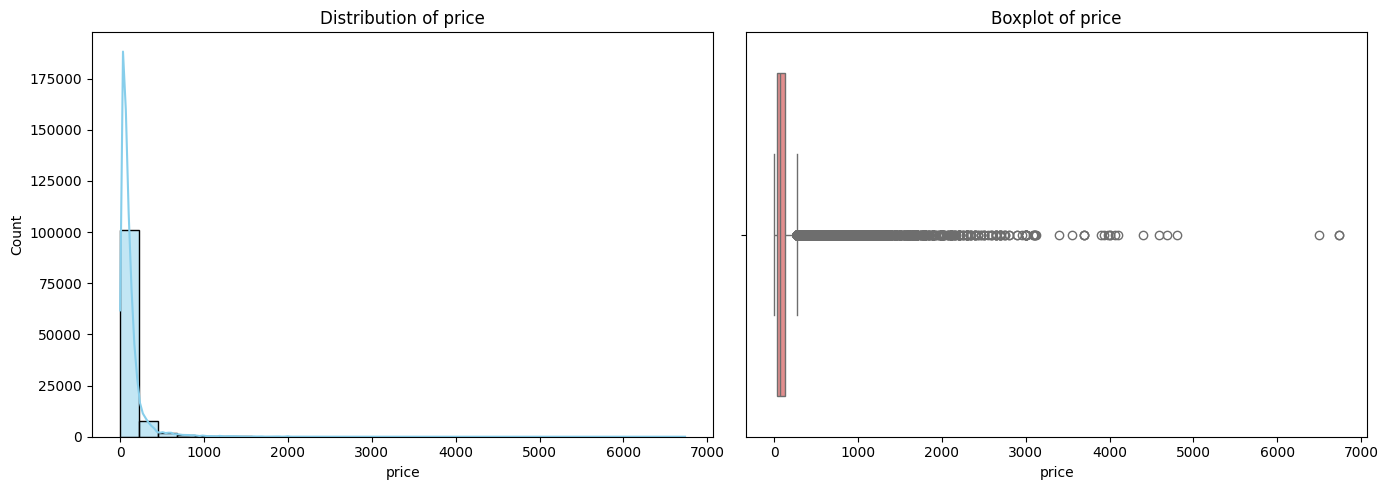

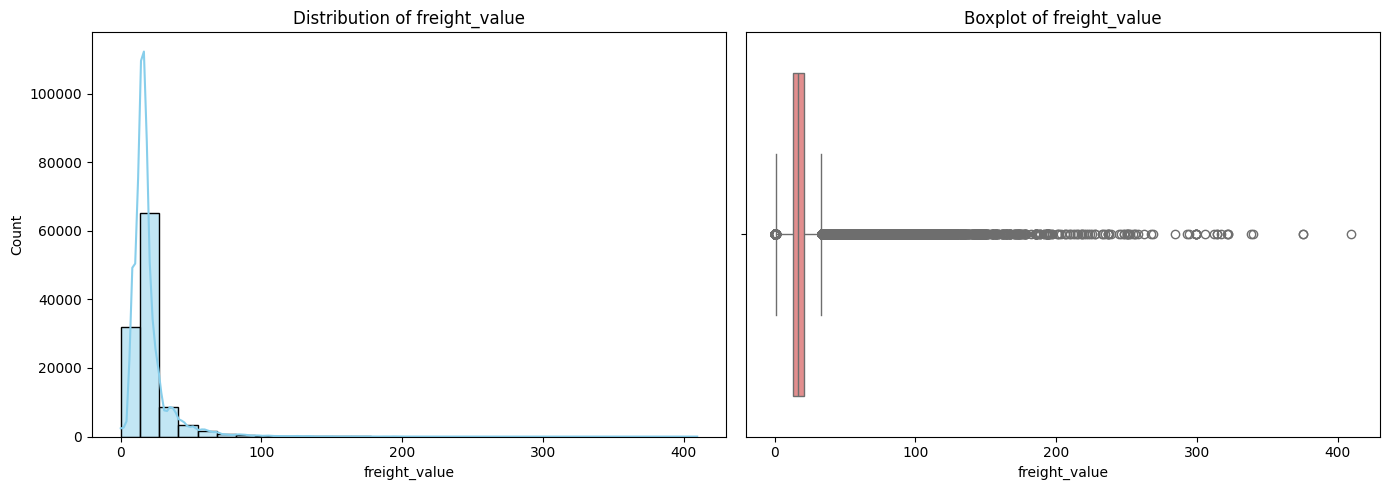

In [10]:
def plot_numeric_columns(df, num_cols):
    for col in num_cols:
        plt.figure(figsize=(14, 5))

        # Histogram with KDE
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {col}')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col], color='lightcoral')
        plt.title(f'Boxplot of {col}')

        plt.tight_layout()
        plt.show()

# List of numeric columns to plot
num_cols = ['price', 'freight_value']

# Call the function
plot_numeric_columns(order_items_df, num_cols)


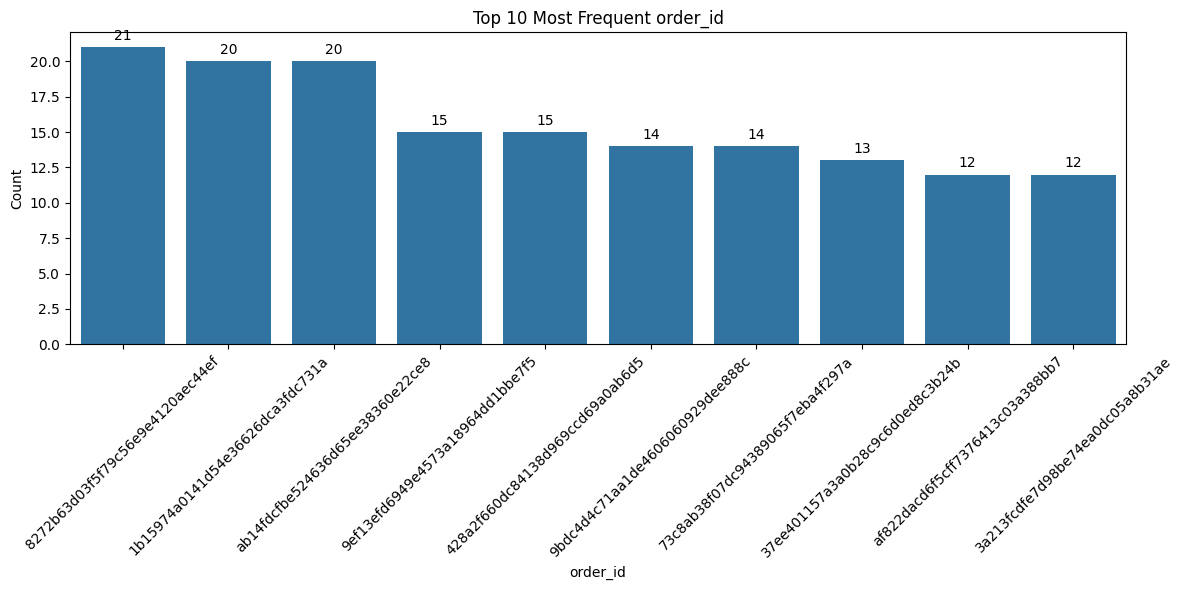

In [11]:
def plot_categorical_columns_top10(df, col):
    plt.figure(figsize=(12, 6))
    
    # Get top 10 most frequent values
    top10 = df[col].value_counts().nlargest(10).index
    
    ax = sns.countplot(
        data=df,
        x=col,
        order=top10
    )

    # Add counts on top
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
    
    # Styling
    plt.title(f'Top 10 Most Frequent {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example: plot top 10 order_ids
plot_categorical_columns_top10(order_items_df, 'order_id')


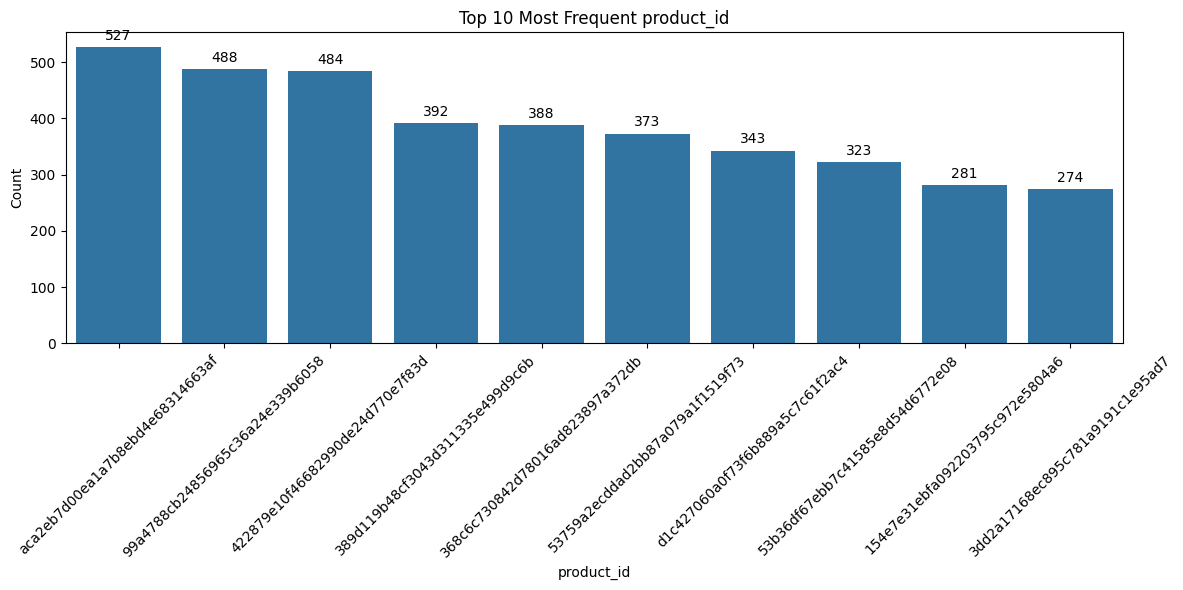

In [16]:
plot_categorical_columns_top10(order_items_df, 'product_id')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9828\2403985305.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


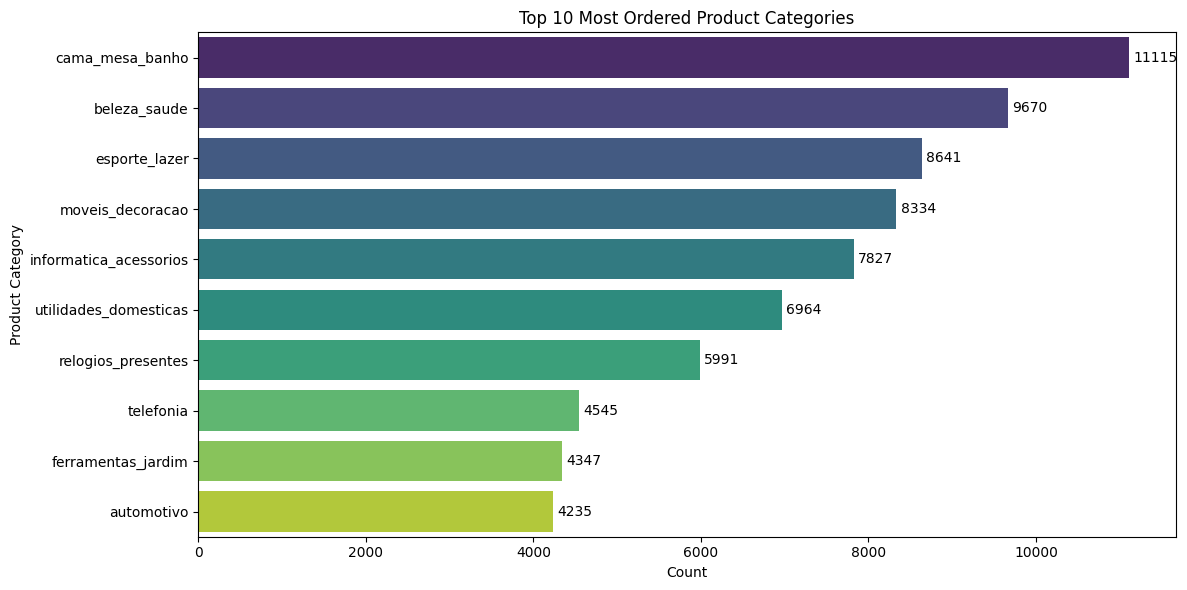

In [ ]:
merged_df = order_items_df.merge(
    product_df[['product_id', 'product_category_name']],
    on='product_id',
    how='left'
)
top10_categories = merged_df['product_category_name'].value_counts().nlargest(10).index
# Plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=merged_df,
    y='product_category_name',
    order=top10_categories,
    palette='viridis'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Top 10 Most Ordered Product Categories')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()